# Practical example using scikit-learn

Scikit-learn is a must have to implement classification and here we will go through some very basic commands, just to have a grasp on how things are working. 

## 1. Let's import the tools we will need to visualize our dataset

In [1]:
#import of libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
#load the data
mushrooms = pd.read_csv('assets/mushrooms.csv')

## 2. Let's explore our data

Let's check the shape of our data

In [3]:
#get the shape of the dataframe
mushrooms.shape

(8124, 23)

Check that there are no null values.

In [4]:
#find null values in the dataset
print(mushrooms.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


### Apply your data visualisation skills to explore and understand the data!

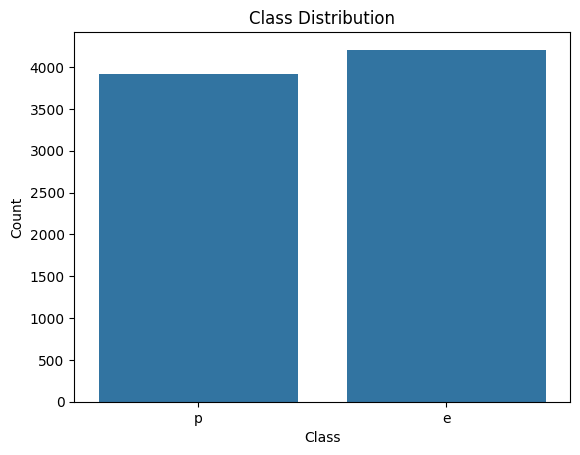

In [14]:
# Add your code to analyse the data here:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=mushrooms, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




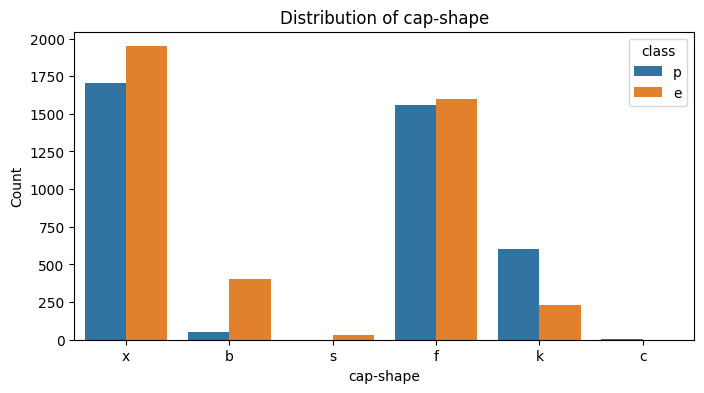

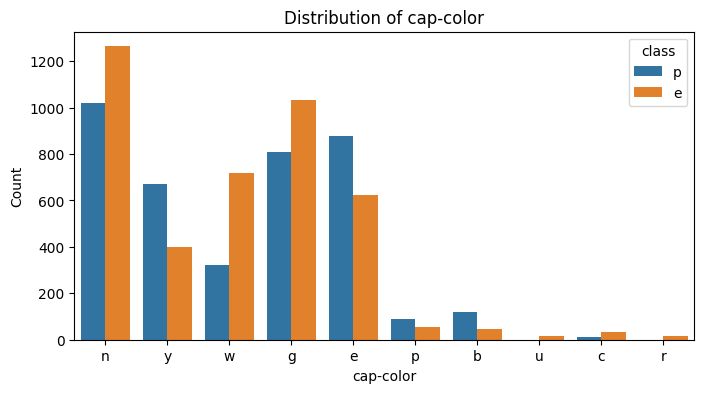

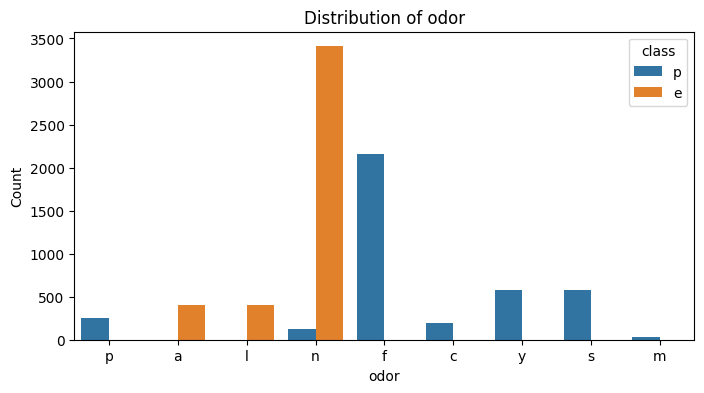

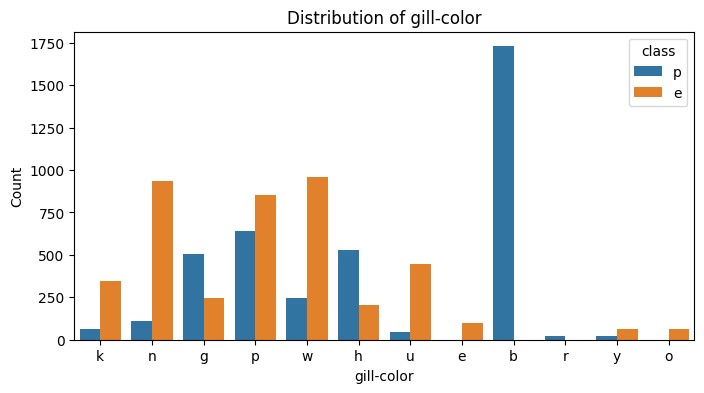

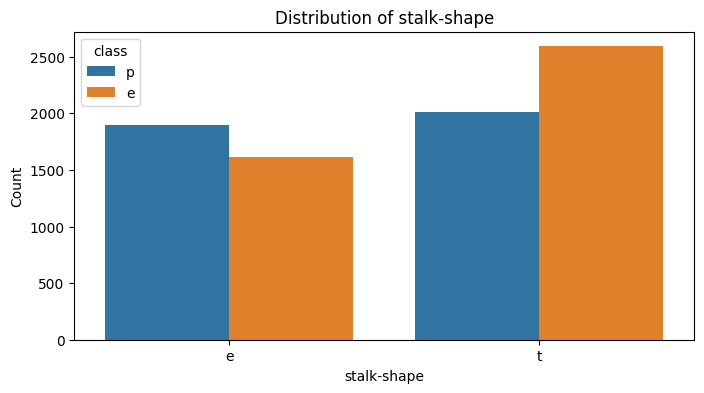

In [15]:
categorical_features = ['cap-shape', 'cap-color', 'odor', 'gill-color', 'stalk-shape']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=mushrooms, x=feature, hue='class')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


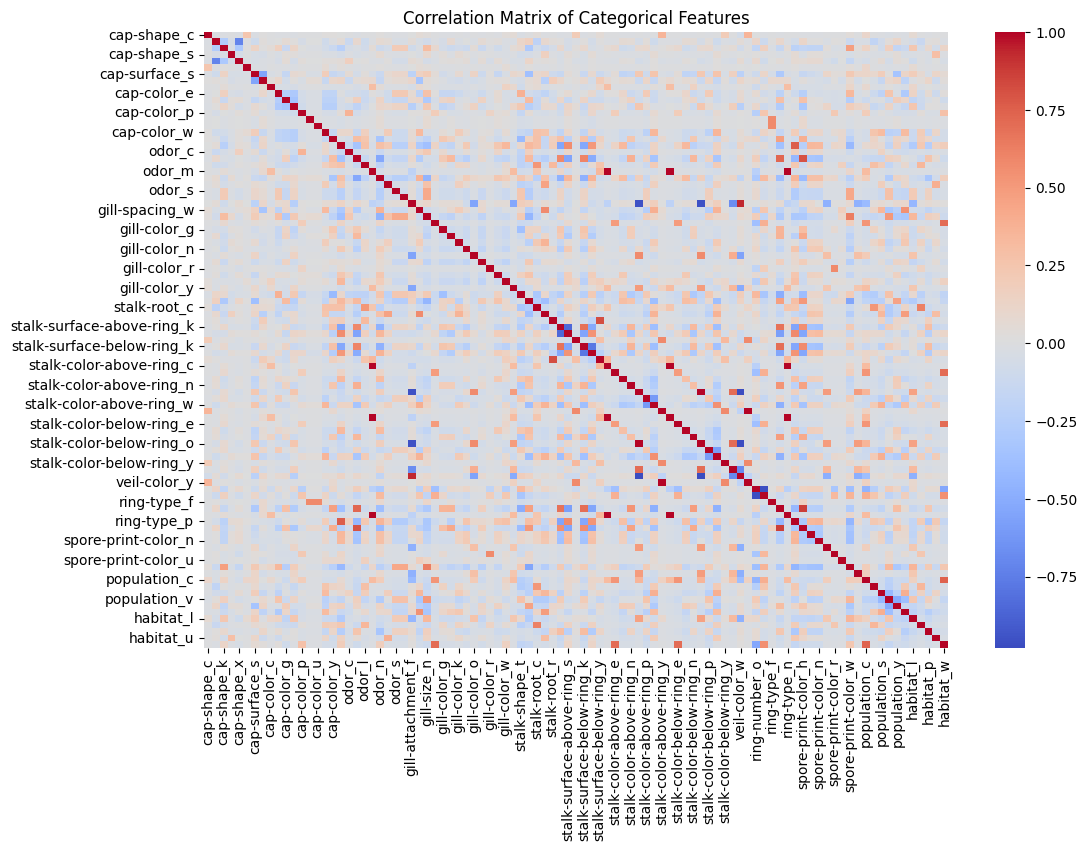

In [17]:
# Encode categorical features (e.g., using LabelEncoder)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_encoded = X.apply(lambda col: encoder.fit_transform(col))

# Calculate correlation matrix
correlation_matrix = X_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Categorical Features')
plt.show()


## 3. Format the dataset for machine learning
Let's isolate our `X` and `y`:

In [7]:
X=mushrooms.drop('class',axis=1) 
y=mushrooms['class'] 

We will train our model based on data `X` and try to predict the class `y`.

As we can see below, our data contains a lot of text data.

In [8]:
print(X.dtypes)
X.head()

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Our model will not be able to understand it, so let's convert them to categorical data with pandas `get_dummies`. In our case, it's super easy because all our columns are text data. 

So we can grab the name of all the columns and apply `get_dummies` on them.

In [9]:
# Get the columns name
X_columns_name = [column_name for column_name in X.columns]
# Label encode them
X = pd.get_dummies(X, columns=X_columns_name, prefix=X_columns_name, drop_first=True)

In [44]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [45]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

## 4. Split the dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We also standardize `X` to get better results. You can find more informations on the [Scikit learn official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [11]:
#scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Fit the model
We give `X_train` and `y_train` to our model so it can learn from our train data.

For this example, we will use a model called [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

But there are way more classification models!

In [12]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Declare an instance of it
classifier = LogisticRegression(solver='lbfgs')
# Fit the model
classifier.fit(X_train,y_train)

LogisticRegression()

## 6. Evaluate the model

In [13]:
# Evaluate the model
classifier.score(X_test, y_test)

1.0

## Conclusion
WOW!!! You achieved the optimal score!! 

Your model is fully trained! 

Yeah, no... It usually does not work that well.

This dataset is designed almost perfectly, that is why it was so easy to achieve such a high score. Let's now classify more "dirty" datasets. 

## A final word of encouragement
![dive](https://media2.giphy.com/media/PiQejEf31116URju4V/giphy.gif?cid=ecf05e471j3r2pzkzjka1xpiizye06uoazl22r8lfdcfvic0&rid=giphy.gif)
